In [2]:
backtest_frame_path = 'D:/QuantAnalysis/backtest_frame'


# backtest_frame_path = '../../backtest-frame'
# data_path = "../../data"
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['font.size'] = '20' # 设置字体大小 
sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import sys 
sys.path.append(backtest_frame_path)
import numba

from datetime import datetime
from tqdm import tqdm
from multiprocessing import Pool,cpu_count
try: 
    import my_config as config
except:
    import config
    print('Failed to import module my_config.py, use default config file.')

data_path = config.data_path

In [3]:
from TDayProcessor import TDayProcessor
# TDayProcessor.data_path = data_path
from TimingFactor import TimingFactor
from BackTest import BackTest
from Factor import Factor
from Data import Data
from NumbaFuncs import NumbaFuncs
from TushareDownloader import TushareDownloader
from ScreenFactor import ScreenFactor, Alpha101
from EventStudy import EventStudy
from utils import *


%load_ext autoreload
%autoreload 2
%matplotlib inline

date_col = 'TradingDay'
secu_col = 'SecuCode'
key_col = [date_col,secu_col]

# 数据读取

In [4]:
DB = Data(data_path,start_dt="2019-01-01",update=True)

100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


100%|██████████| 5/5 [00:06<00:00,  1.21s/it]


100%|██████████| 5/5 [00:02<00:00,  2.01it/s]


100%|██████████| 5/5 [01:32<00:00, 18.44s/it]


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


# Alpha 101 测试

In [ ]:
df = daily_df_qfq.merge(DB.ret_df,on=key_col,how='left')
df.head(1)

SecuCode TradingDay        open        high        low      close  \
0   000001 2019-01-02  1014.41109  1017.65202  989.56396  992.80489   

   TurnoverVolume  TurnoverValue  is_new  adj_factor  raw_close_close  \
0      53938632.0    498695109.0    True     108.031        -0.020464   

   excess_return is_hs300 is_sz180 is_sz50 is_zz1000 is_zz500  
0       -0.01177     True    False   False     False    False

In [ ]:
# df['vwap'] = df['TurnoverValue'] / df['TurnoverVolume'] * df['adj_factor']

## alpha1 okay

In [ ]:
df = Alpha101.alpha1(df)
# df.droplevel

IC(%)   t-value    IC+(%)    IC-(%)  RankIC(%)      ICIR  \
total -0.898763 -4.423086 -1.125744  0.276774  -1.650483 -0.123267   
2019  -1.422665 -3.458423 -1.327084  0.220606  -2.500145 -0.237941   
2020  -0.371474 -0.745031 -0.928460  0.553559  -1.314392 -0.046298   
2021  -0.664343 -1.691362 -0.782558  0.120247  -1.483338 -0.092323   
2022  -0.823723 -1.793282 -1.097445  0.264586  -1.210515 -0.104189   
2023  -1.360184 -2.552918 -1.609750  0.234782  -1.798338 -0.191376   

       Winning Rate(%)  IC_Min(%)  IC_Max(%)  
total        44.630282 -25.272269  26.469007  
2019         40.833333 -18.282764  15.558547  
2020         47.325103 -25.272269  26.469007  
2021         43.621399 -16.427833  21.985713  
2022         45.867769 -20.618670  23.107401  
2023         45.833333 -23.674850  15.658665

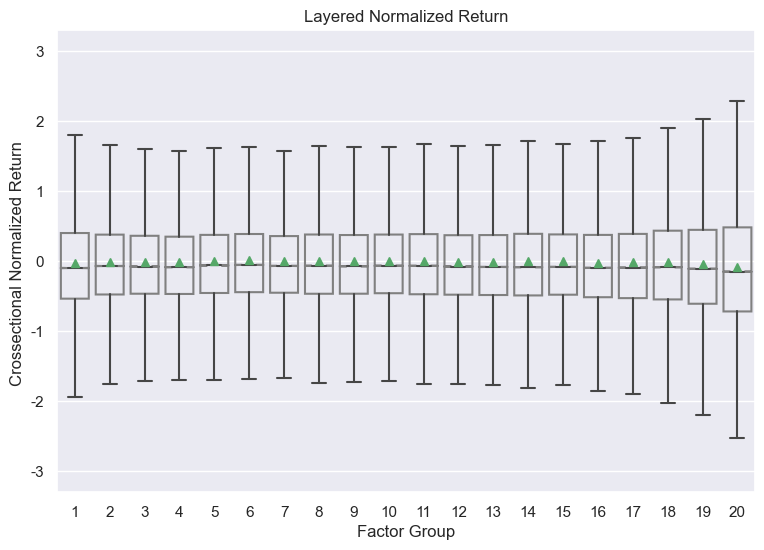

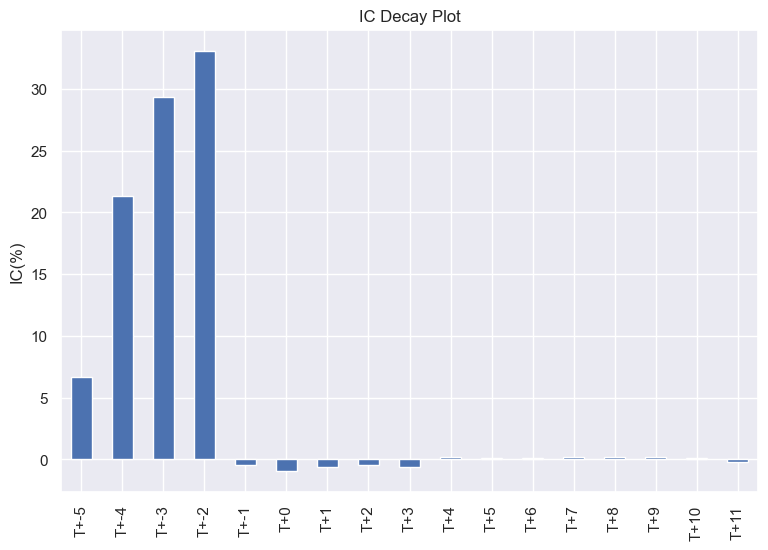

ZeroDivisionError: division by zero

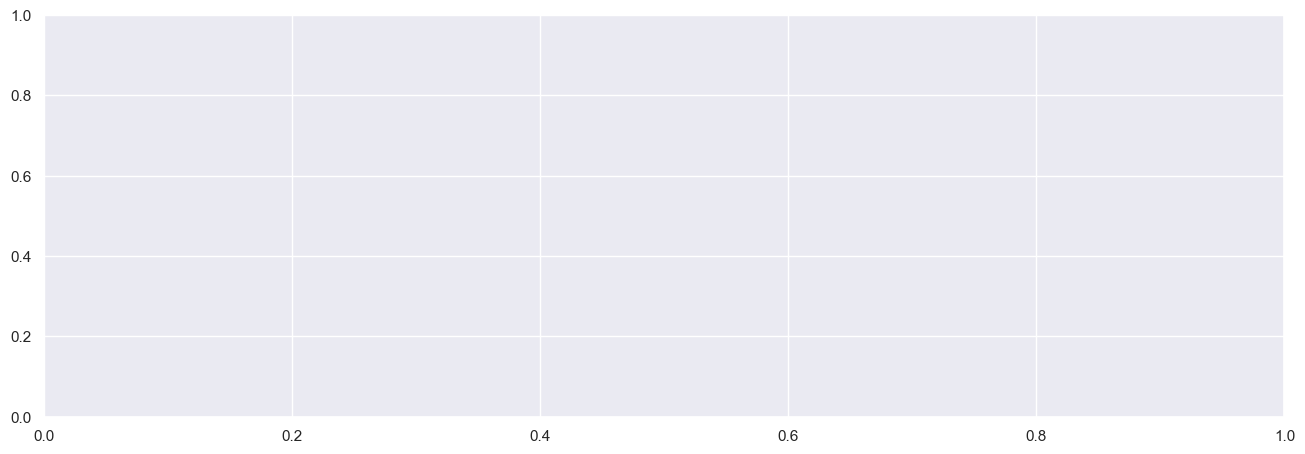

In [ ]:
BT = BackTest(df[key_col + ['alpha1']])
BT.ic_analysis(DB.ret_df)


## alpha2 Bad

In [ ]:
df = Alpha101.alpha2(df)
# df.droplevel

IC(%)   t-value    IC+(%)    IC-(%)  RankIC(%)      ICIR  \
total -0.282547 -2.239731 -0.560519  0.273277  -1.284583 -0.065461   
2019  -0.583098 -2.632380 -0.832774  0.247685  -1.785881 -0.171222   
2020   0.139871  0.464005 -0.306742  0.440178  -1.076658  0.030024   
2021  -0.385247 -1.667686 -0.541980  0.161508  -1.397179 -0.089561   
2022  -0.160939 -0.556106 -0.451350  0.289013  -0.854835 -0.036897   
2023  -0.496177 -1.563477 -0.737146  0.232082  -1.334324 -0.101913   

       Winning Rate(%)  IC_Min(%)  IC_Max(%)  
total        45.278023 -18.494255  15.148969  
2019         39.662447  -9.332872  10.901329  
2020         51.440329 -18.494255  15.148969  
2021         45.679012 -11.631220  12.739853  
2022         47.520661 -11.358173  11.115670  
2023         40.476190 -13.245266  13.897457

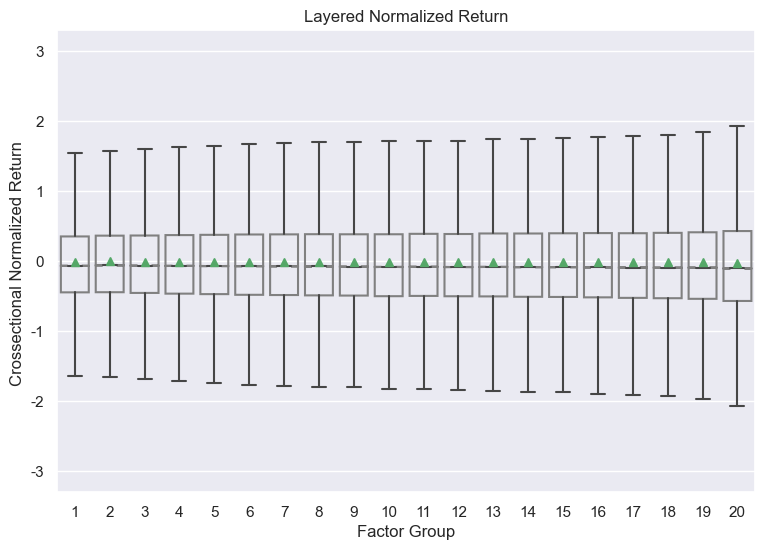

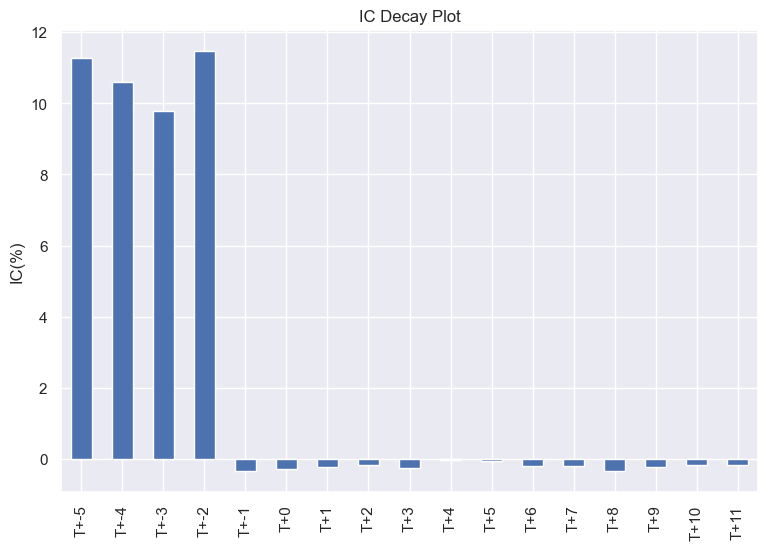

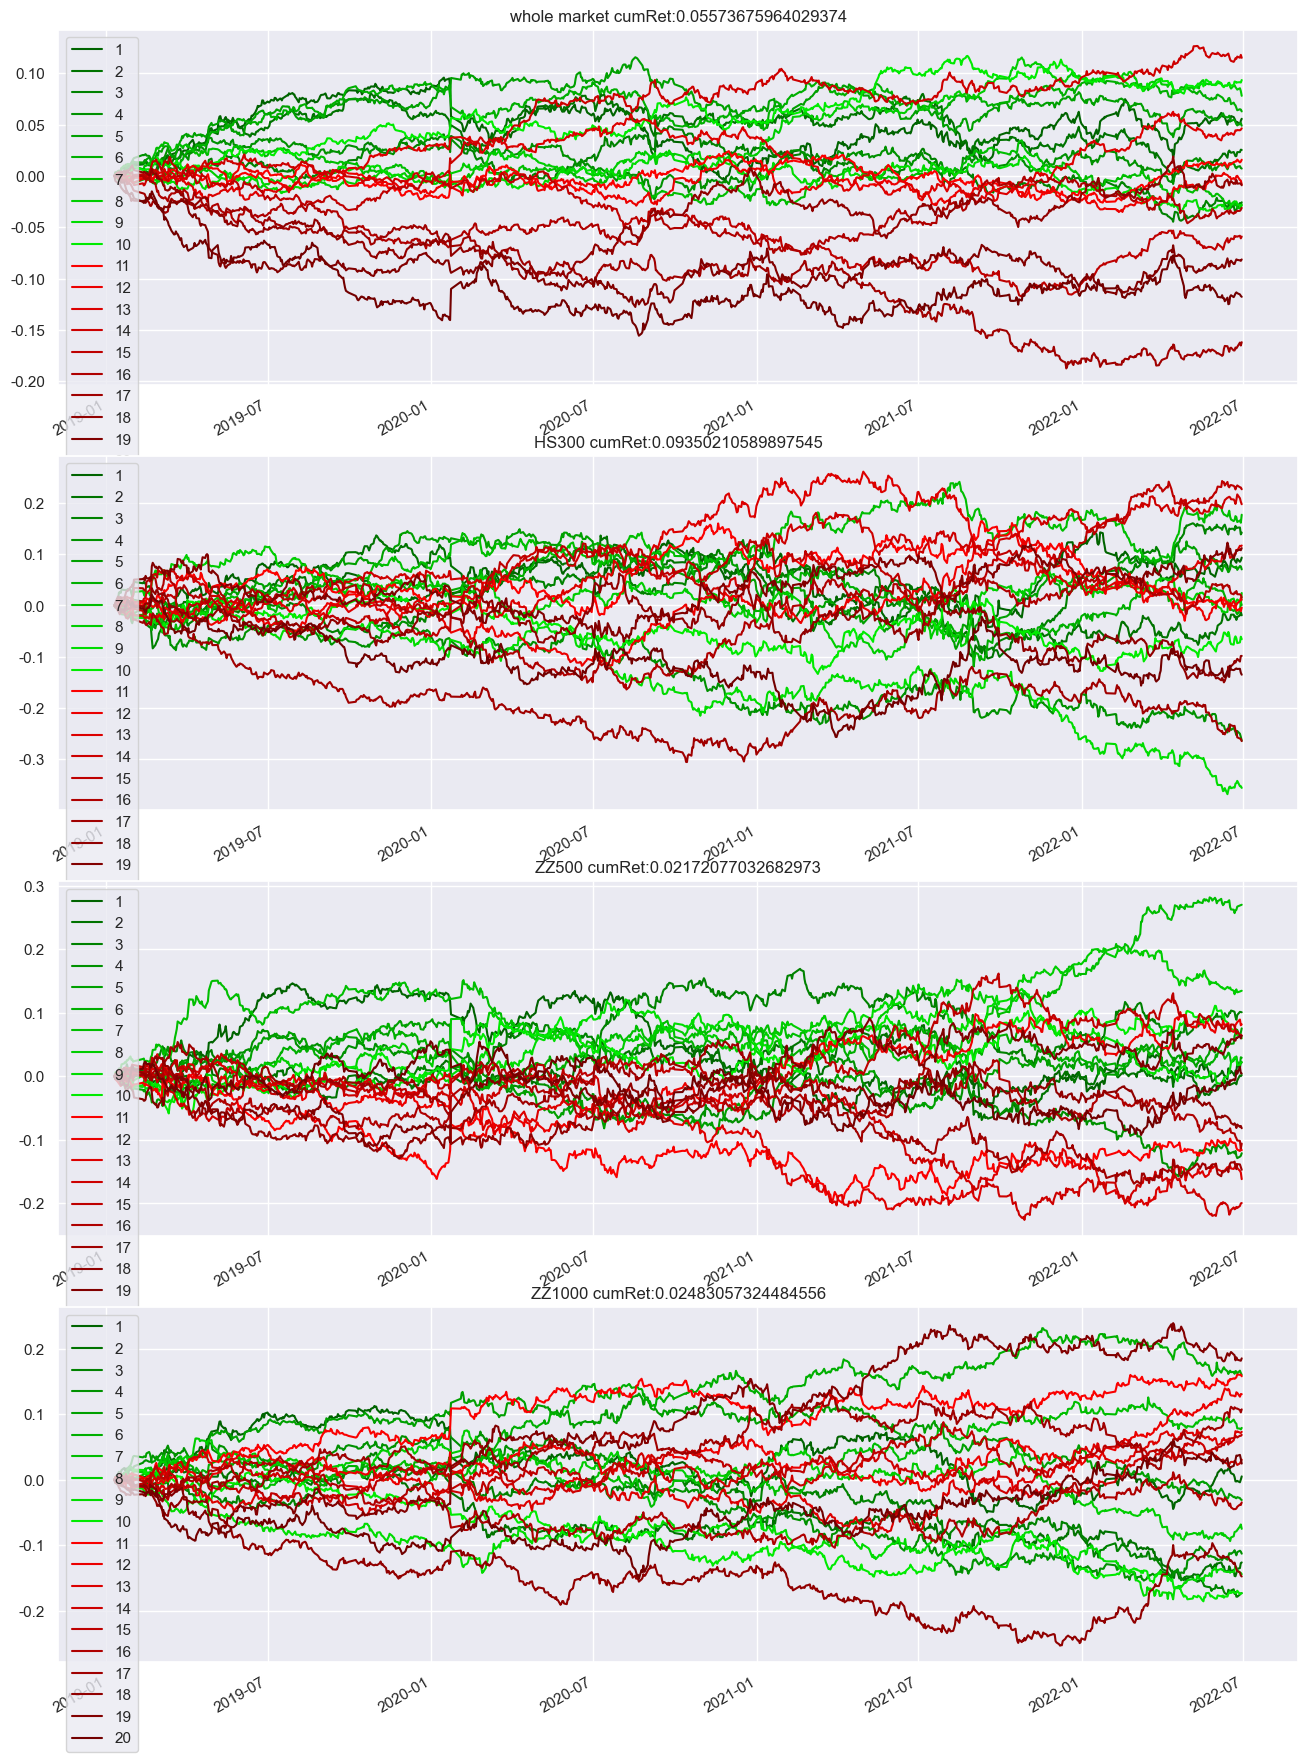

In [ ]:
BT = BackTest(df[key_col + ['alpha2']])
BT.ic_analysis(DB.ret_df)


## alpha3 good

In [ ]:
df = Alpha101.alpha3(df)
# df.droplevel

IC(%)   t-value    IC+(%)    IC-(%)  RankIC(%)      ICIR  \
total -1.326591 -8.893211 -1.159760 -0.143262  -1.947947 -0.271870   
2019  -1.453460 -4.666366 -1.279480 -0.168261  -1.998276 -0.313774   
2020  -1.478437 -4.371465 -1.162385 -0.296911  -2.132982 -0.286391   
2021  -1.080822 -3.971503 -0.979430 -0.087520  -1.474100 -0.242753   
2022  -1.677194 -4.759557 -1.338961 -0.333940  -2.533647 -0.325357   
2023  -0.779941 -2.078911 -1.017337  0.238484  -1.451607 -0.156850   

       Winning Rate(%)  IC_Min(%)  IC_Max(%)  
total        38.461538 -16.028078  18.575774  
2019         37.872340 -13.812811  11.716039  
2020         34.156379 -15.996518  18.575774  
2021         38.683128 -16.028078  10.623102  
2022         38.842975 -13.434260  14.022040  
2023         44.642857 -11.908487  14.384663

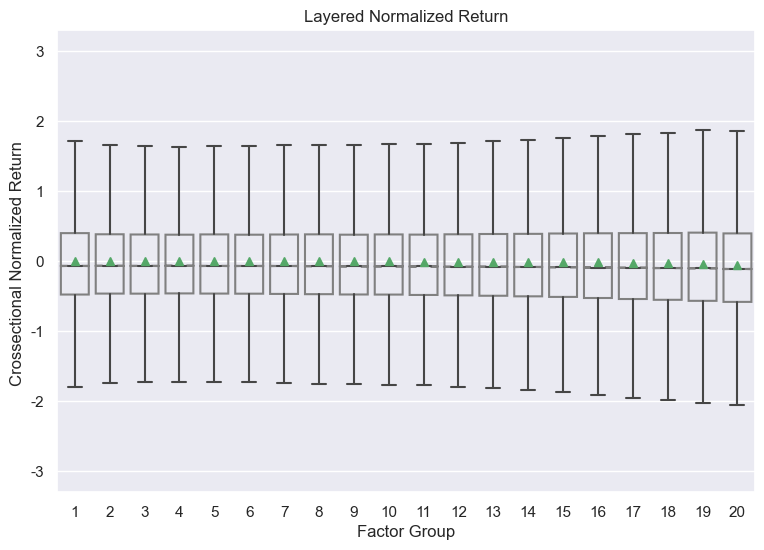

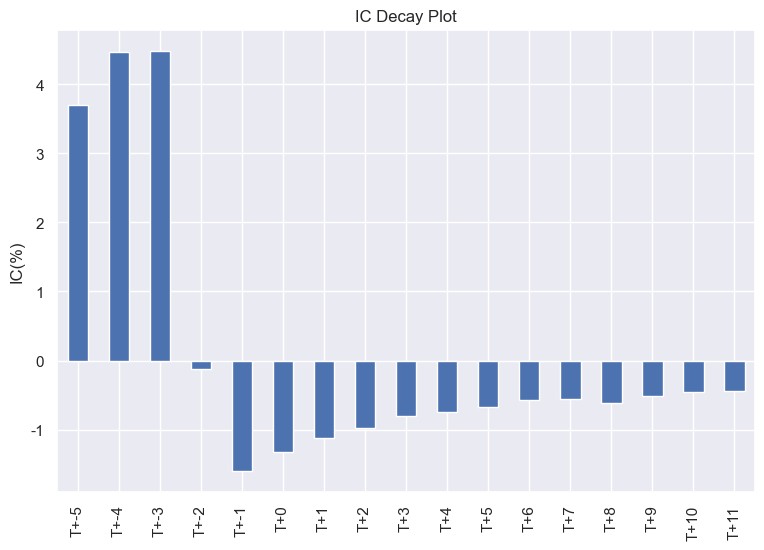

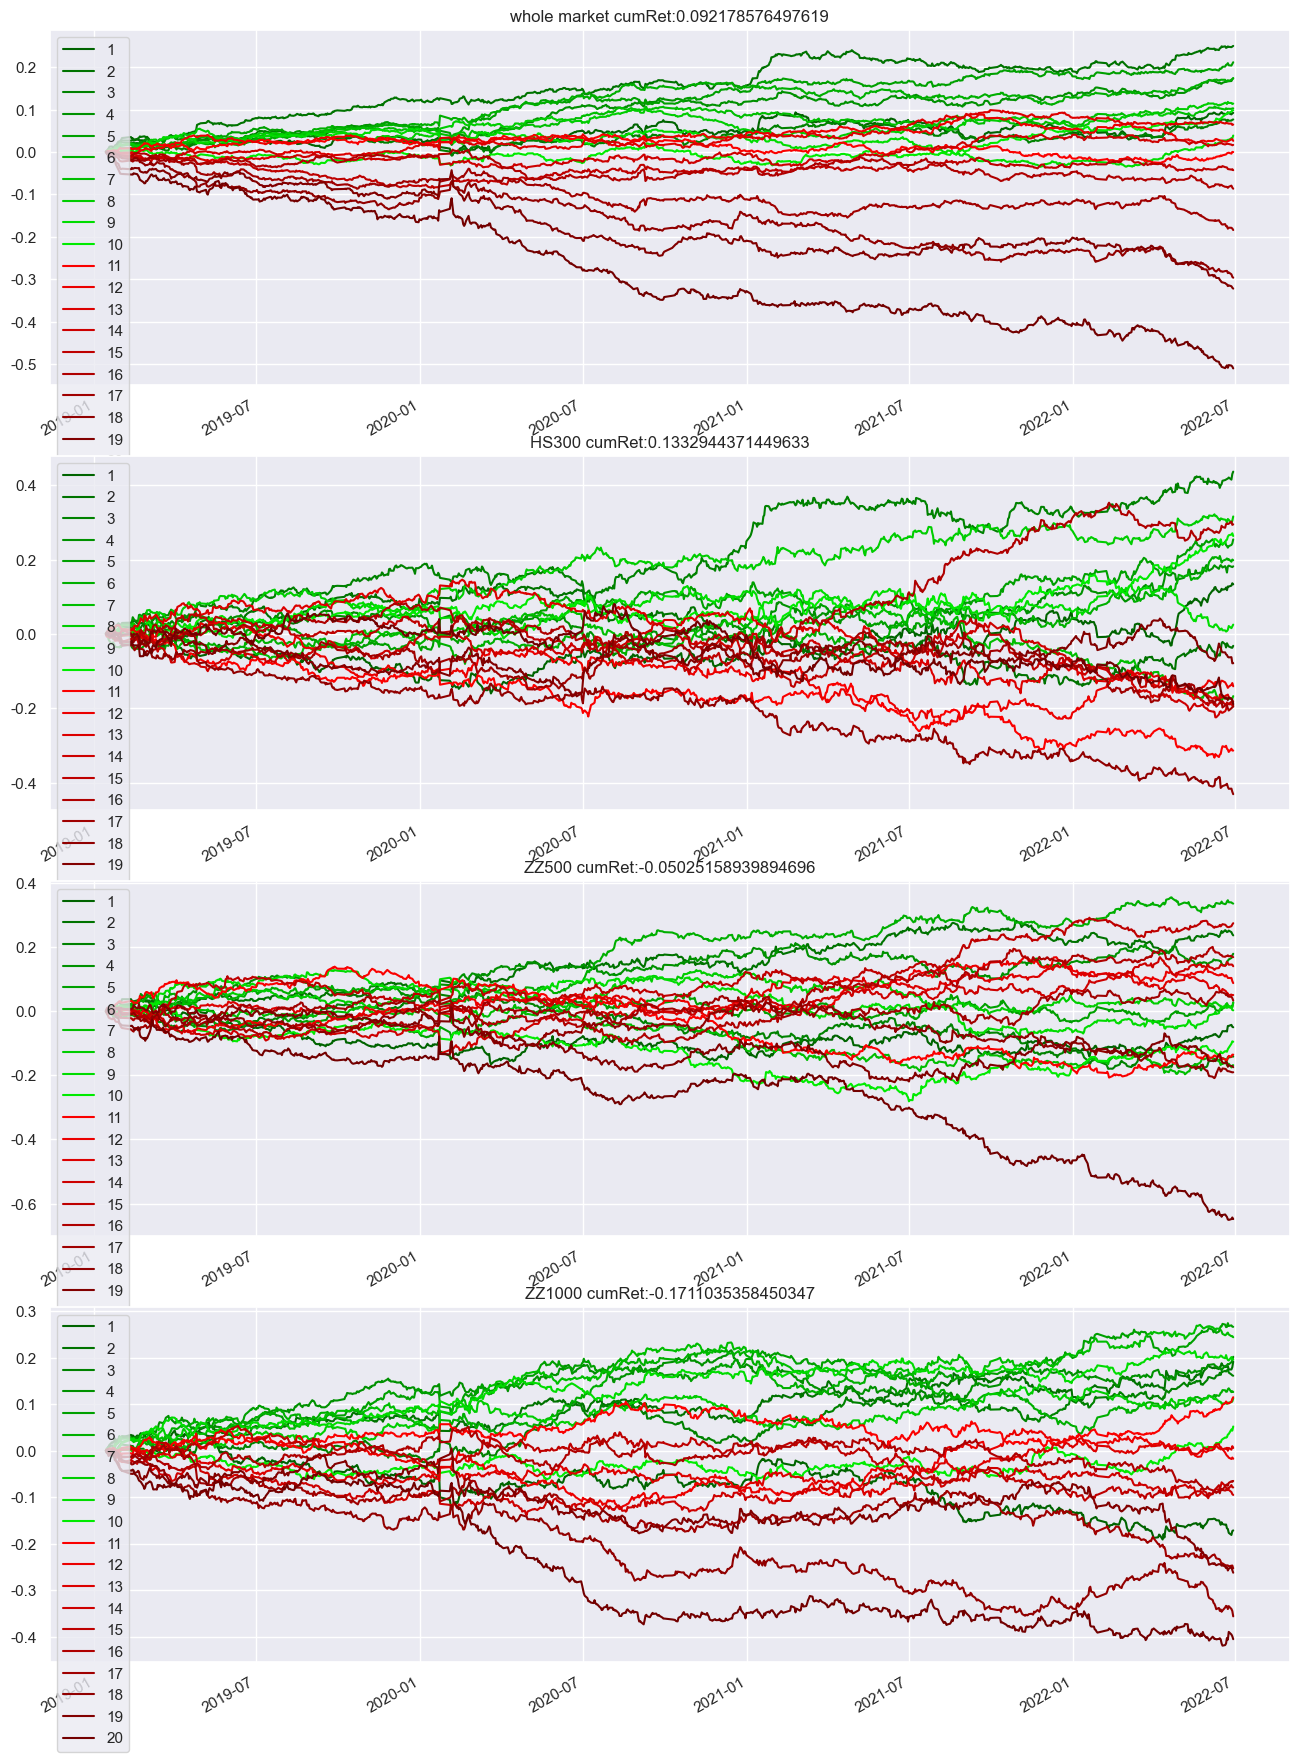

In [ ]:

BT = BackTest(df[key_col + ['alpha3']])
BT.ic_analysis(DB.ret_df)


## alpha4 okay

IC(%)   t-value    IC+(%)    IC-(%)  RankIC(%)      ICIR  \
total  1.392492  5.022170  0.146015  1.260760   2.741169  0.143244   
2019   1.591772  2.845328  0.098528  1.496911   3.409825  0.186733   
2020   1.009754  1.520625 -0.042758  1.045995   2.951876  0.099828   
2021   1.340984  2.608365  0.236513  1.106965   2.742172  0.138125   
2022   1.566427  2.555970  0.292104  1.285258   2.427328  0.153485   
2023   1.490110  1.852960  0.090862  1.416455   1.947722  0.147350   

       Winning Rate(%)  IC_Min(%)  IC_Max(%)  
total        56.360424 -33.580994  35.207495  
2019         58.474576 -25.995776  30.188639  
2020         55.555556 -28.853934  35.207495  
2021         55.555556 -26.645118  28.434289  
2022         56.198347 -24.825783  28.264552  
2023         55.952381 -33.580994  33.582849

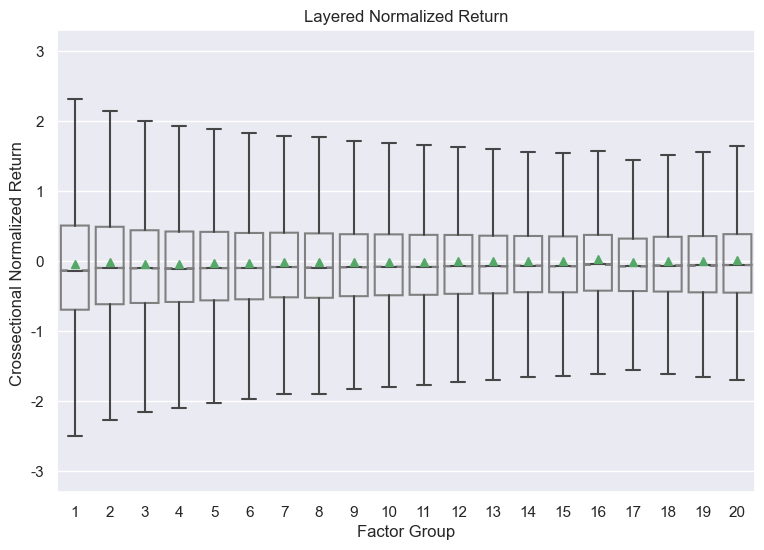

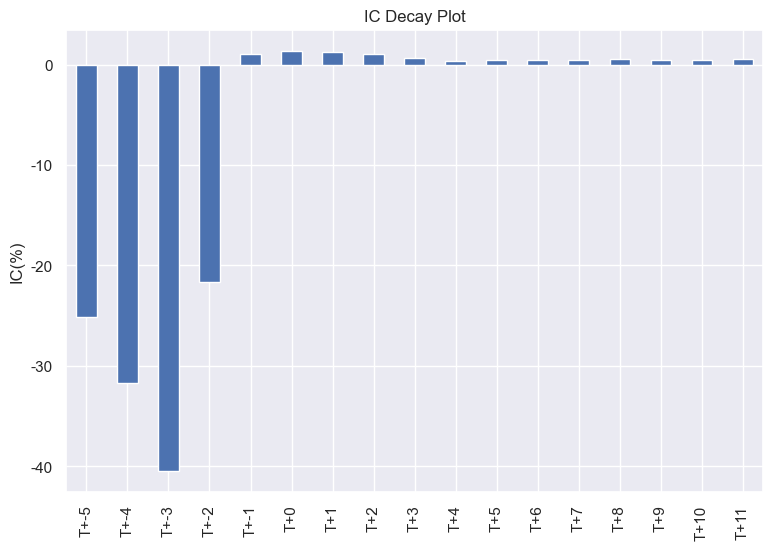

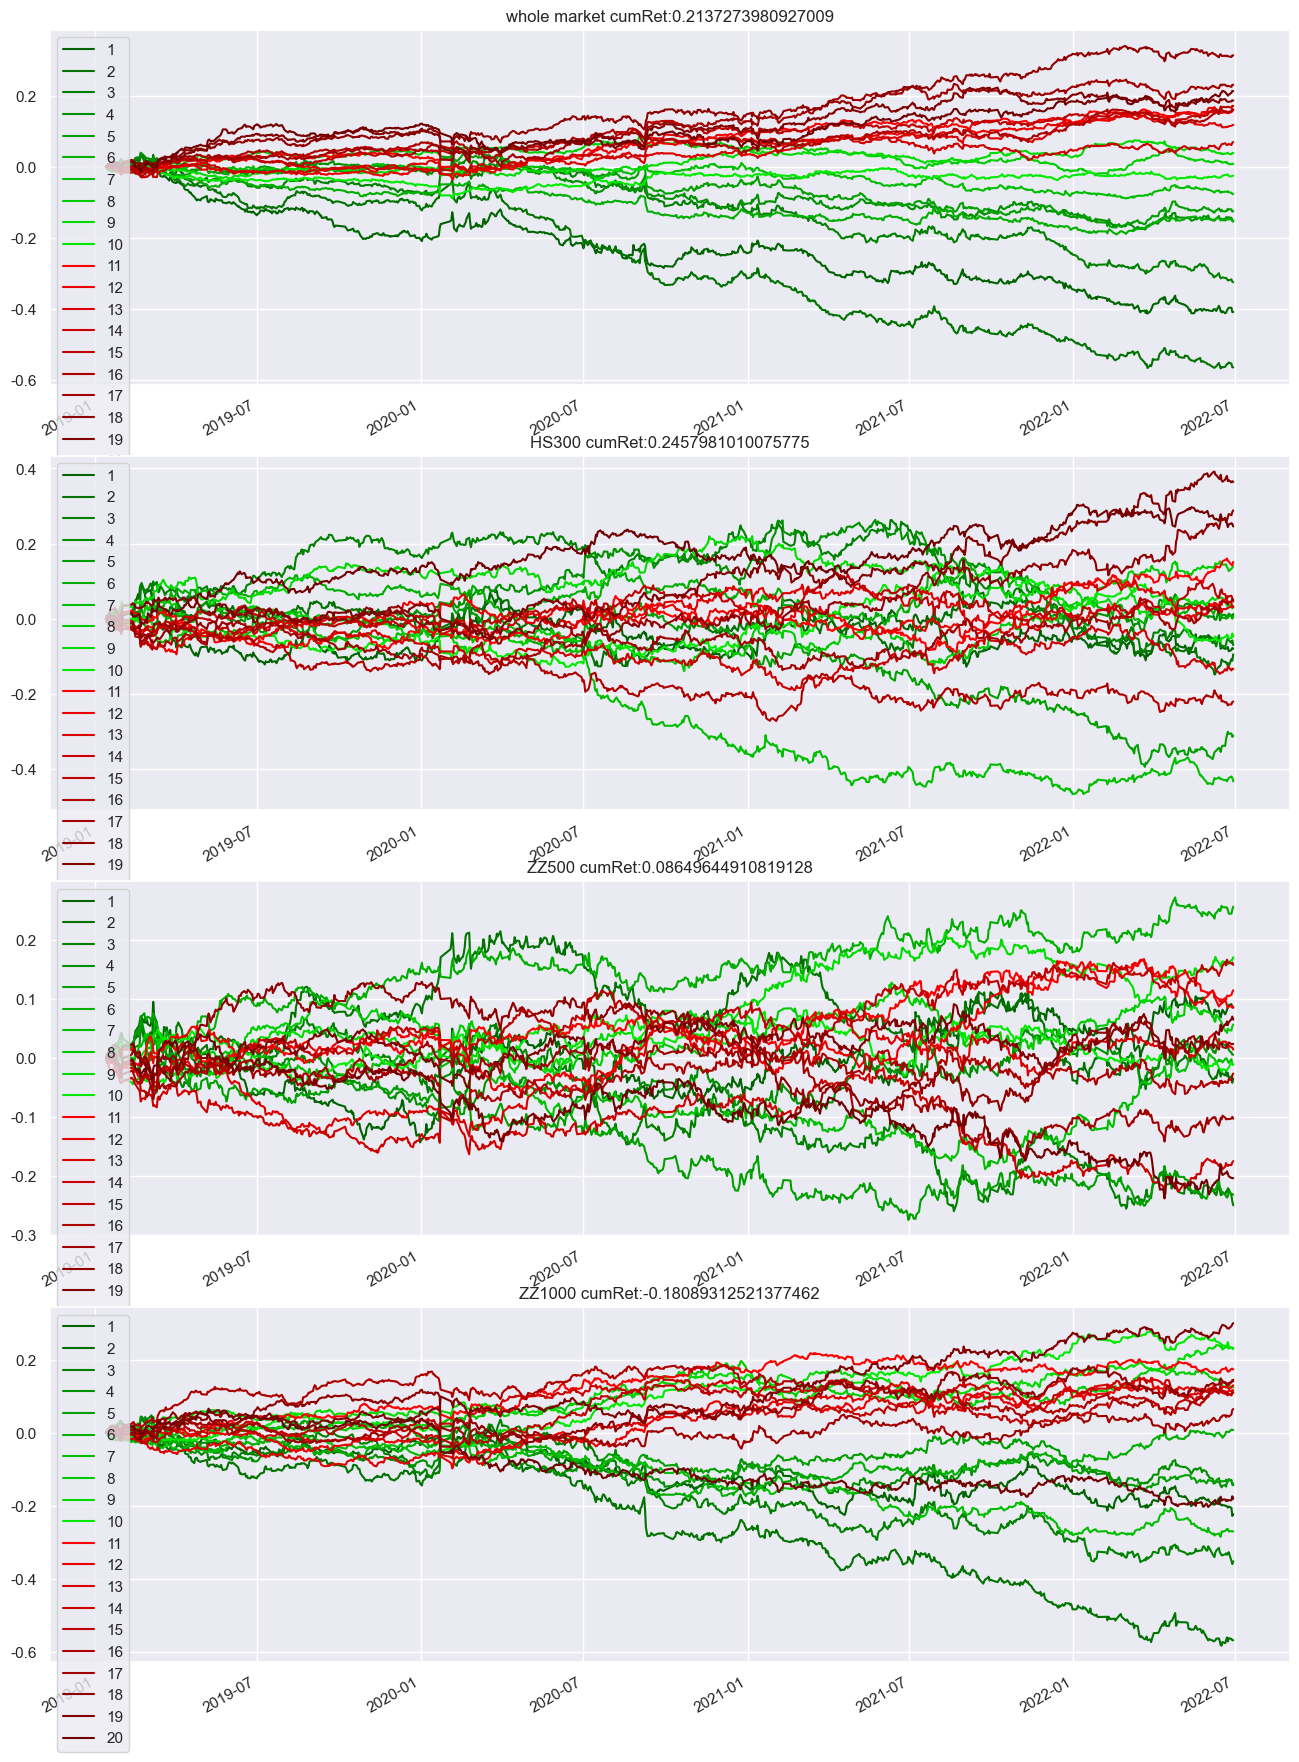

In [ ]:
df = Alpha101.alpha4(df)
BT = BackTest(df[key_col + ['alpha4']])
BT.ic_analysis(DB.ret_df)


## alpha5 bad

IC(%)   t-value    IC+(%)    IC-(%)  RankIC(%)      ICIR  \
total  0.626187  2.223927 -0.526293  1.151391   1.318395  0.065271   
2019   1.271312  2.415147 -0.108206  1.384746   2.423238  0.165096   
2020   0.056869  0.089081 -0.646390  0.701595   1.281858  0.005668   
2021   0.548289  0.926226 -0.544121  1.116783   1.291205  0.056126   
2022   0.704019  1.057825 -0.580883  1.288952   0.864898  0.067782   
2023   0.547818  0.728314 -0.711678  1.268610   0.518356  0.055118   

       Winning Rate(%)  IC_Min(%)  IC_Max(%)  
total        53.050398 -36.715295  40.423479  
2019         54.893617 -17.914436  28.975873  
2020         50.205761 -33.702681  40.423479  
2021         54.320988 -31.697168  25.961441  
2022         54.132231 -27.431065  27.070883  
2023         51.190476 -36.715295  23.738002

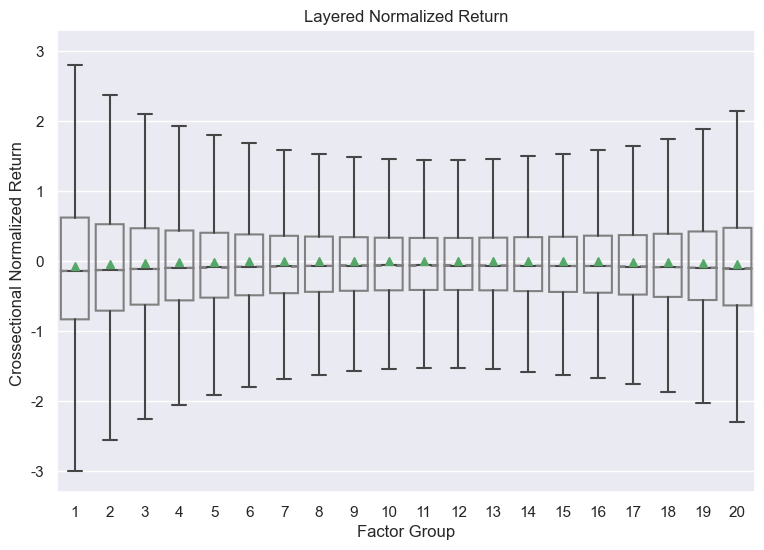

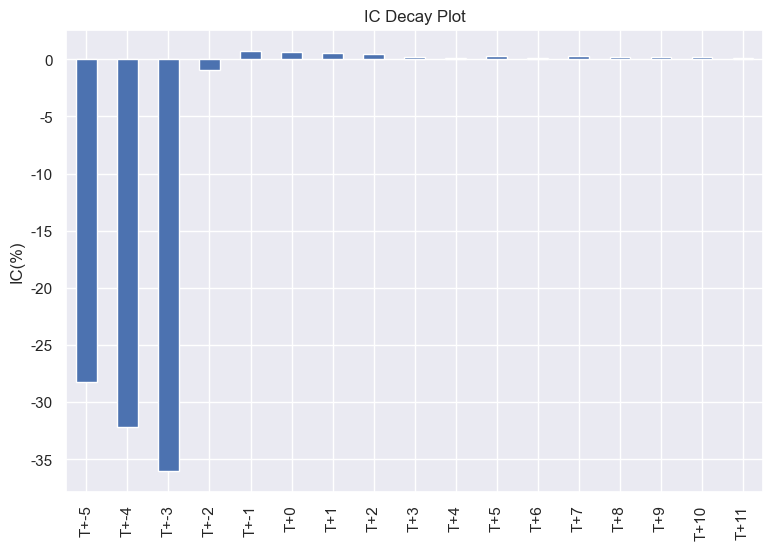

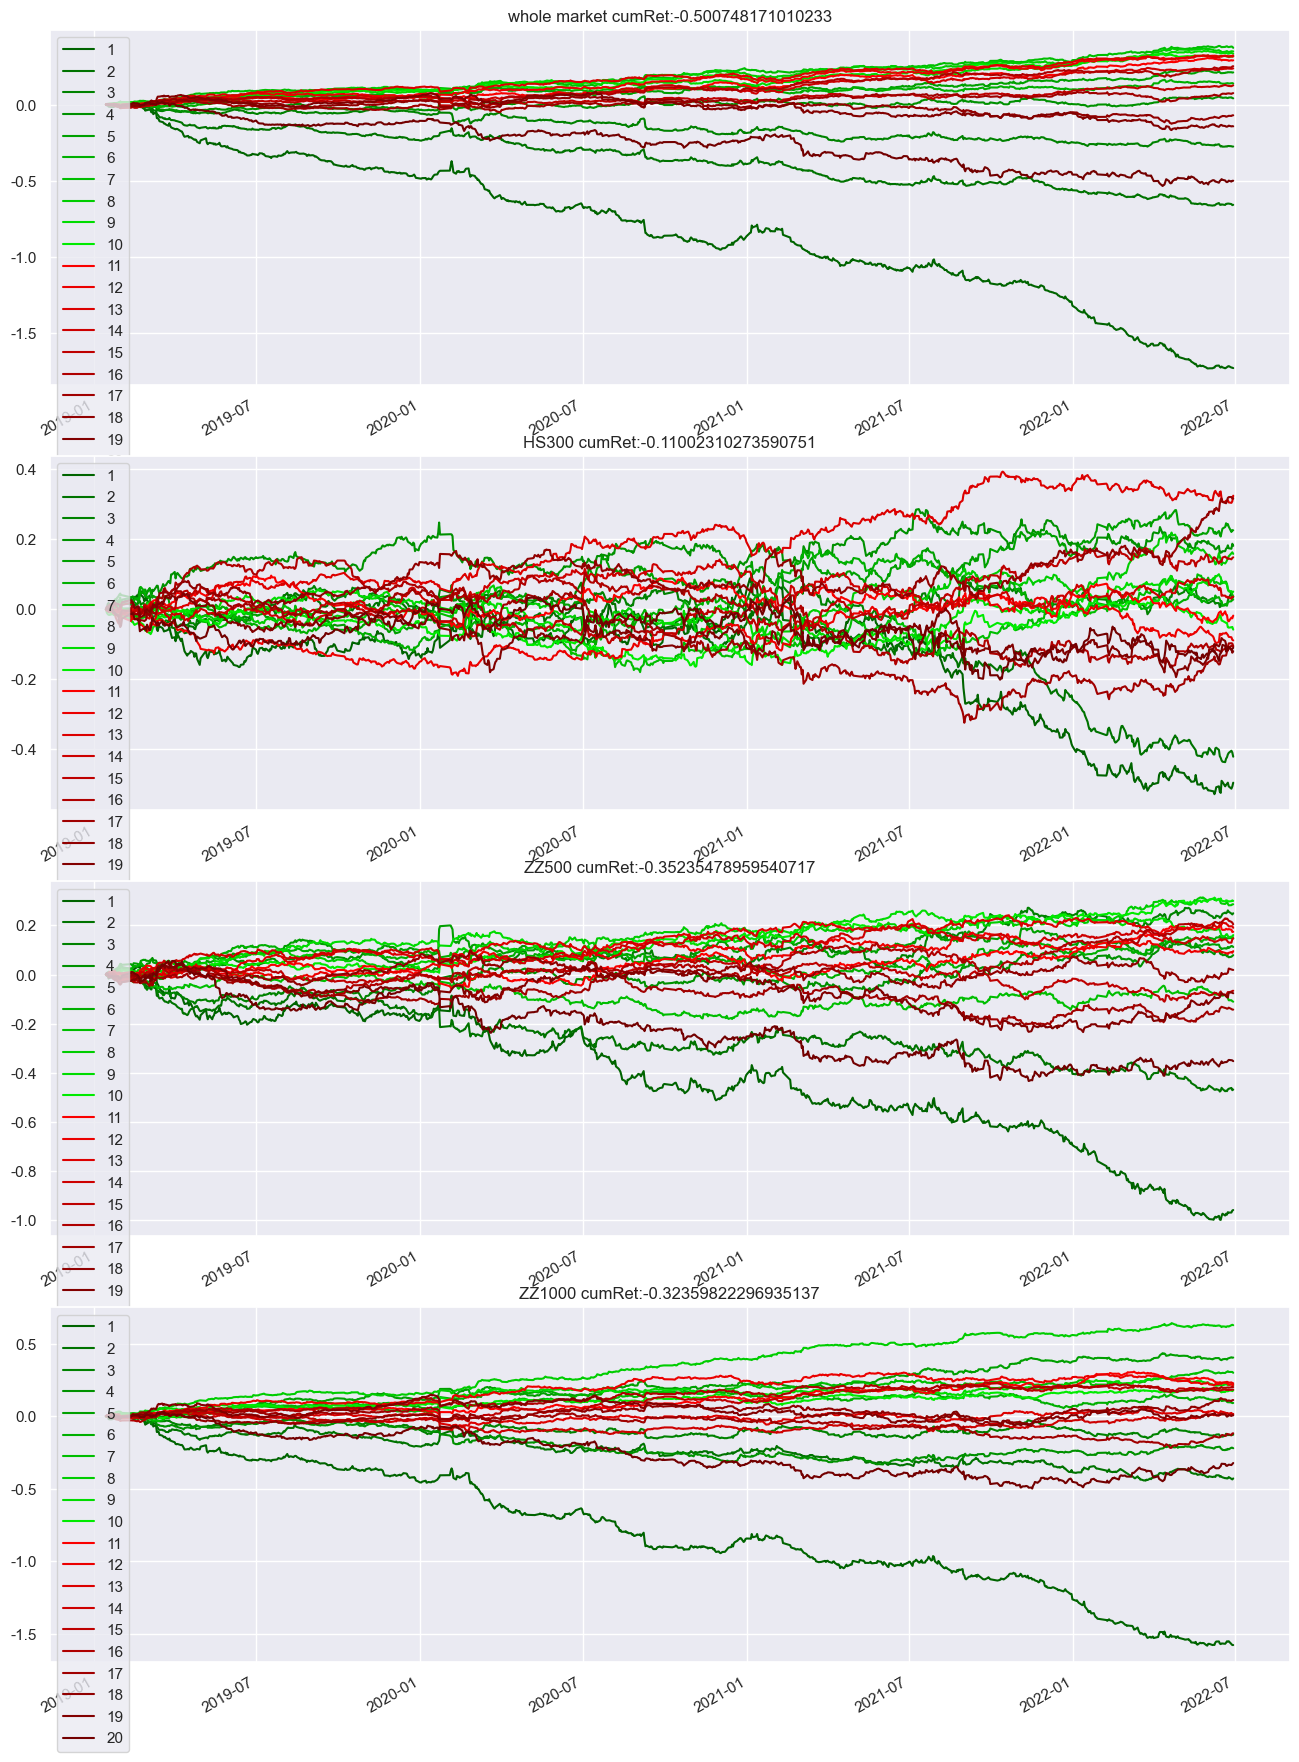

In [ ]:
df = Alpha101.alpha5(df)
BT = BackTest(df[key_col + ['alpha5']])
BT.ic_analysis(DB.ret_df)


## alpha 6

IC(%)   t-value    IC+(%)    IC-(%)  RankIC(%)      ICIR  \
total -1.281953 -7.343954 -1.207724 -0.045253  -1.637720 -0.211663   
2019  -1.642254 -4.550481 -1.426018 -0.209614  -1.770790 -0.304273   
2020  -1.482495 -4.109404 -1.248145 -0.219954  -1.845786 -0.227669   
2021  -0.729722 -2.174728 -0.840683  0.113737  -0.897558 -0.129351   
2022  -1.593351 -3.739241 -1.402623 -0.177240  -2.331940 -0.248789   
2023  -0.838095 -1.664981 -1.134088  0.291169  -1.221211 -0.133161   

       Winning Rate(%)  IC_Min(%)  IC_Max(%)  
total        41.909814 -22.953995  17.817996  
2019         40.851064 -17.603155  10.771349  
2020         37.448560 -22.953995  17.817996  
2021         42.798354 -17.366910  14.398333  
2022         40.909091 -18.614849  15.635975  
2023         50.000000 -16.180885  15.490891

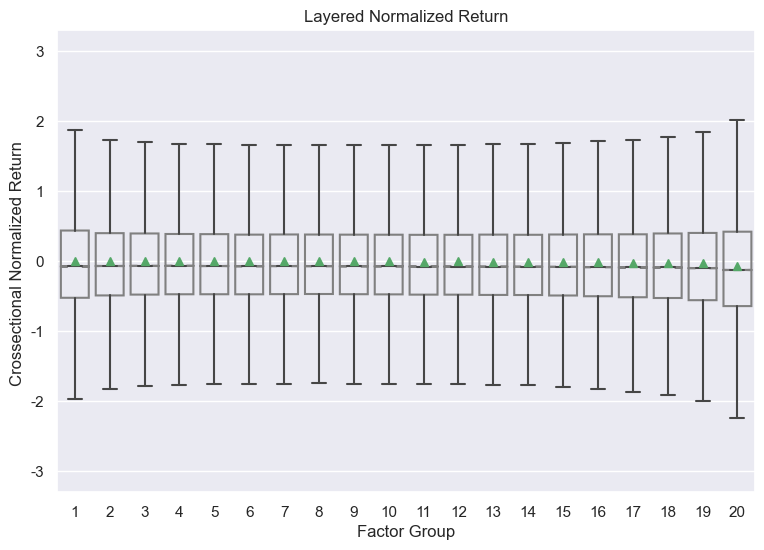

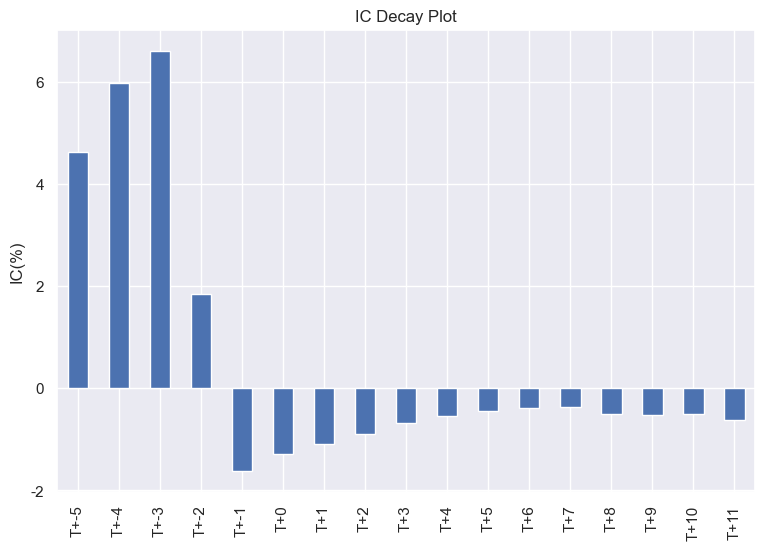

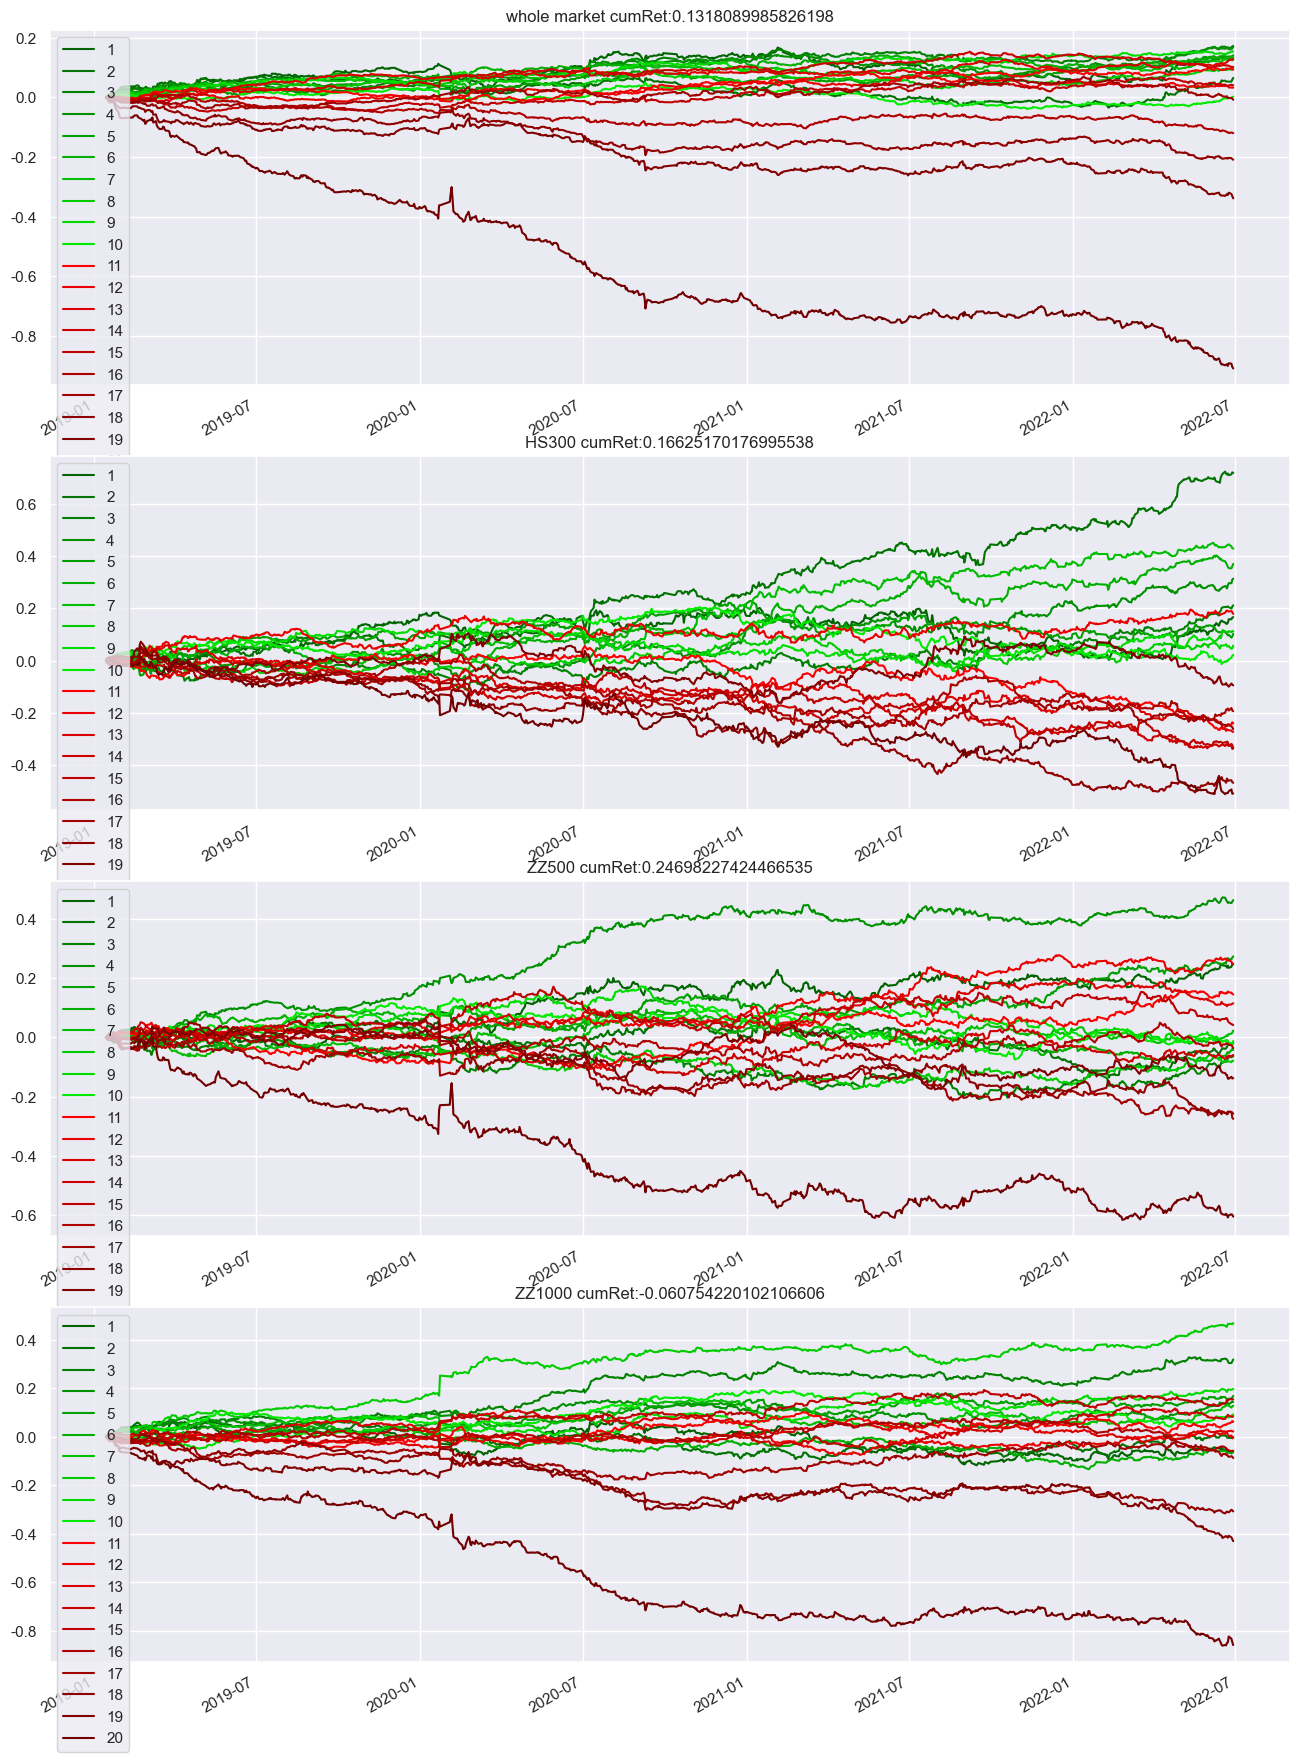

In [ ]:
df = Alpha101.alpha6(df)
BT = BackTest(df[key_col + ['alpha6']])
BT.ic_analysis(DB.ret_df)


## alpha7 Extremely Bad

IC(%)   t-value    IC+(%)    IC-(%)  RankIC(%)      ICIR  \
total -0.159239 -1.278559 -0.410298  0.271760  -1.776504 -0.040285   
2019  -0.794603 -3.015928 -0.969697  0.180649  -2.301266 -0.232516   
2020  -0.007778 -0.031263 -0.368953  0.358525  -1.466251 -0.001867   
2021  -0.183894 -0.858090 -0.418182  0.242232  -1.696206 -0.050901   
2022   0.315660  1.108701  0.026446  0.286344  -1.542806  0.075370   
2023  -0.353551 -0.977888 -0.614782  0.262041  -1.975241 -0.083804   

       Winning Rate(%)  IC_Min(%)  IC_Max(%)  
total        43.443354 -13.118977  19.751073  
2019         30.666667 -13.118977  10.779316  
2020         50.617284 -12.436522  19.751073  
2021         44.032922 -10.220865  11.467434  
2022         47.933884 -12.479652  19.271082  
2023         42.857143 -11.613619  15.572520

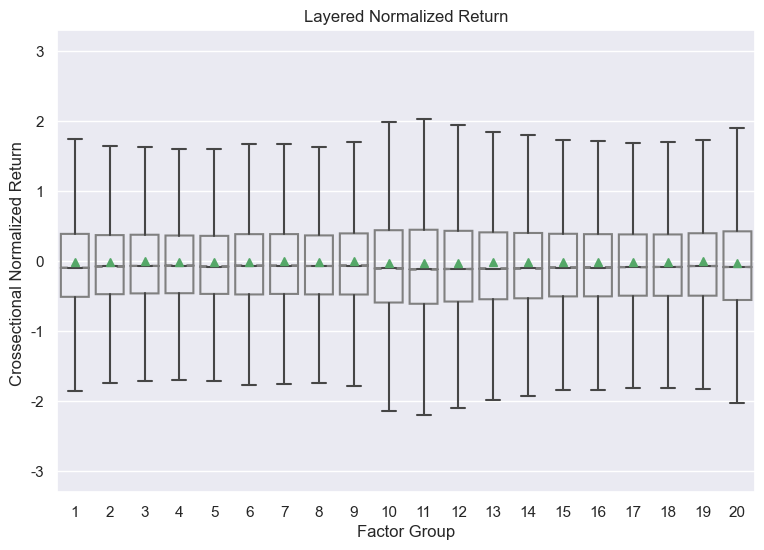

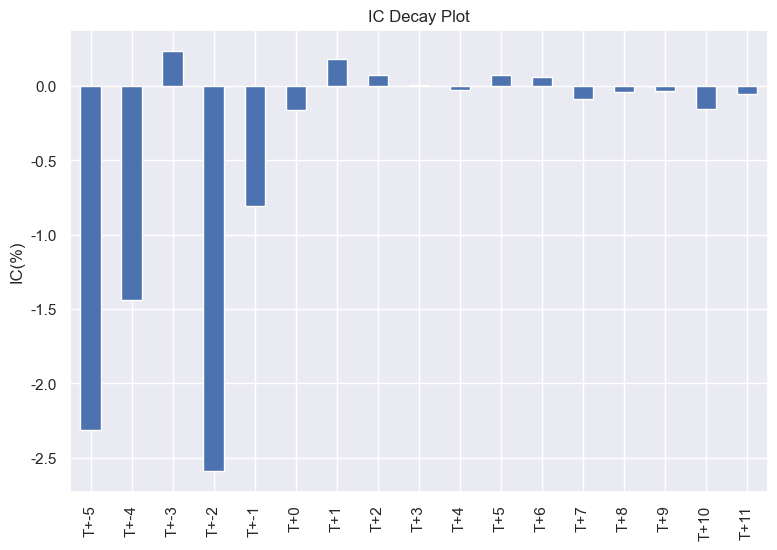

ZeroDivisionError: division by zero

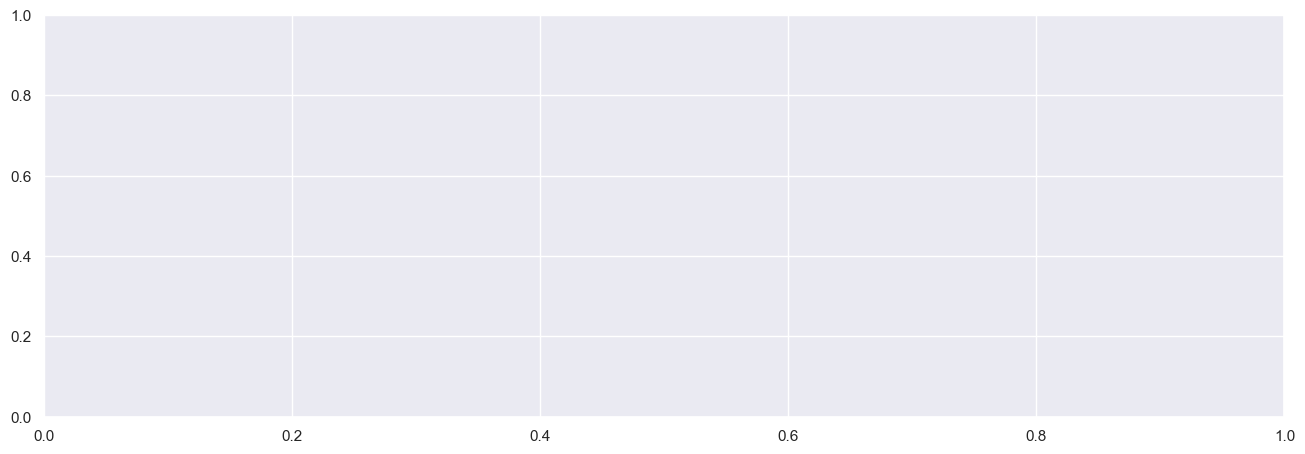

In [ ]:
df = Alpha101.alpha7(df)
BT = BackTest(df[key_col + ['alpha7']])
BT.ic_analysis(DB.ret_df)


## alpha8 okay 但有失效风险

IC(%)   t-value    IC+(%)    IC-(%)  RankIC(%)      ICIR  \
total  0.771296  3.174957 -0.500092  1.253737   1.301683  0.094199   
2019   1.052546  2.235056 -0.302219  1.353662   1.894188  0.145124   
2020   0.435881  0.776339 -0.311319  0.744865   1.192411  0.049072   
2021   1.344692  2.922792 -0.184857  1.533280   2.094726  0.168661   
2022   0.848070  1.550454 -0.603213  1.464879   1.096701  0.103241   
2023  -0.068566 -0.100457 -1.142703  1.085480  -0.203235 -0.007959   

       Winning Rate(%)  IC_Min(%)  IC_Max(%)  
total        53.285968 -28.487493  31.697193  
2019         56.086957 -16.025712  24.006375  
2020         50.617284 -28.487493  31.697193  
2021         54.732510 -21.129290  21.640617  
2022         54.545455 -22.871548  28.677744  
2023         49.404762 -22.728573  20.320291

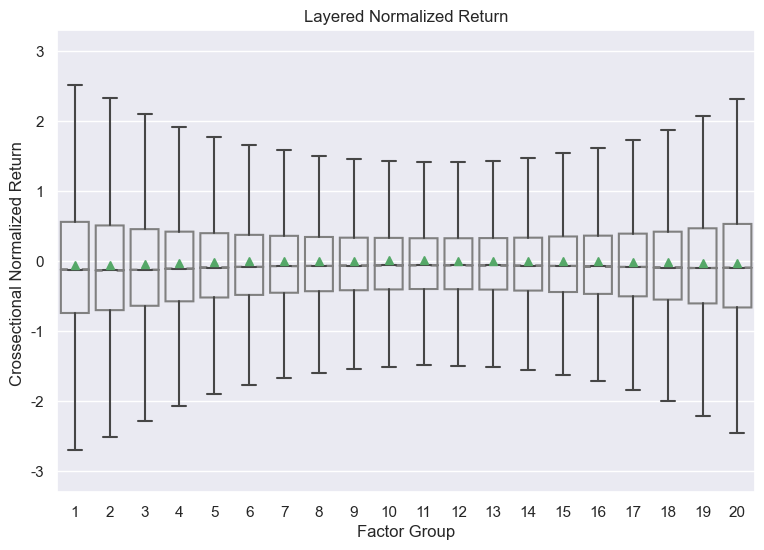

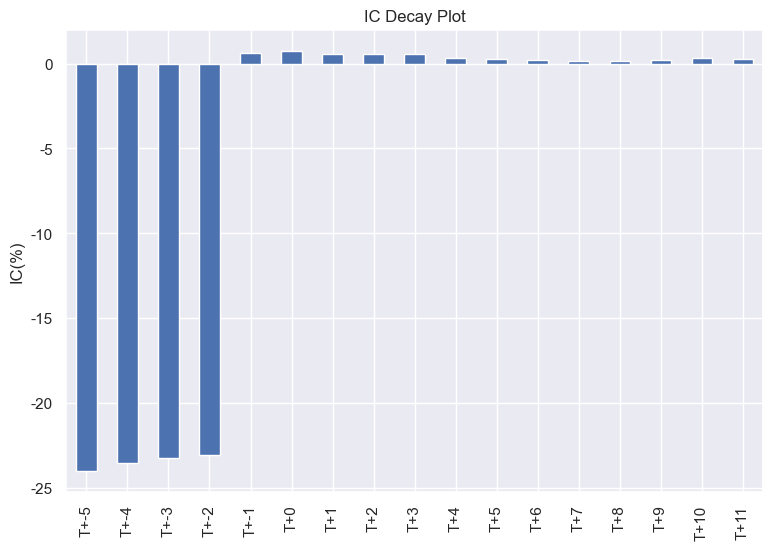

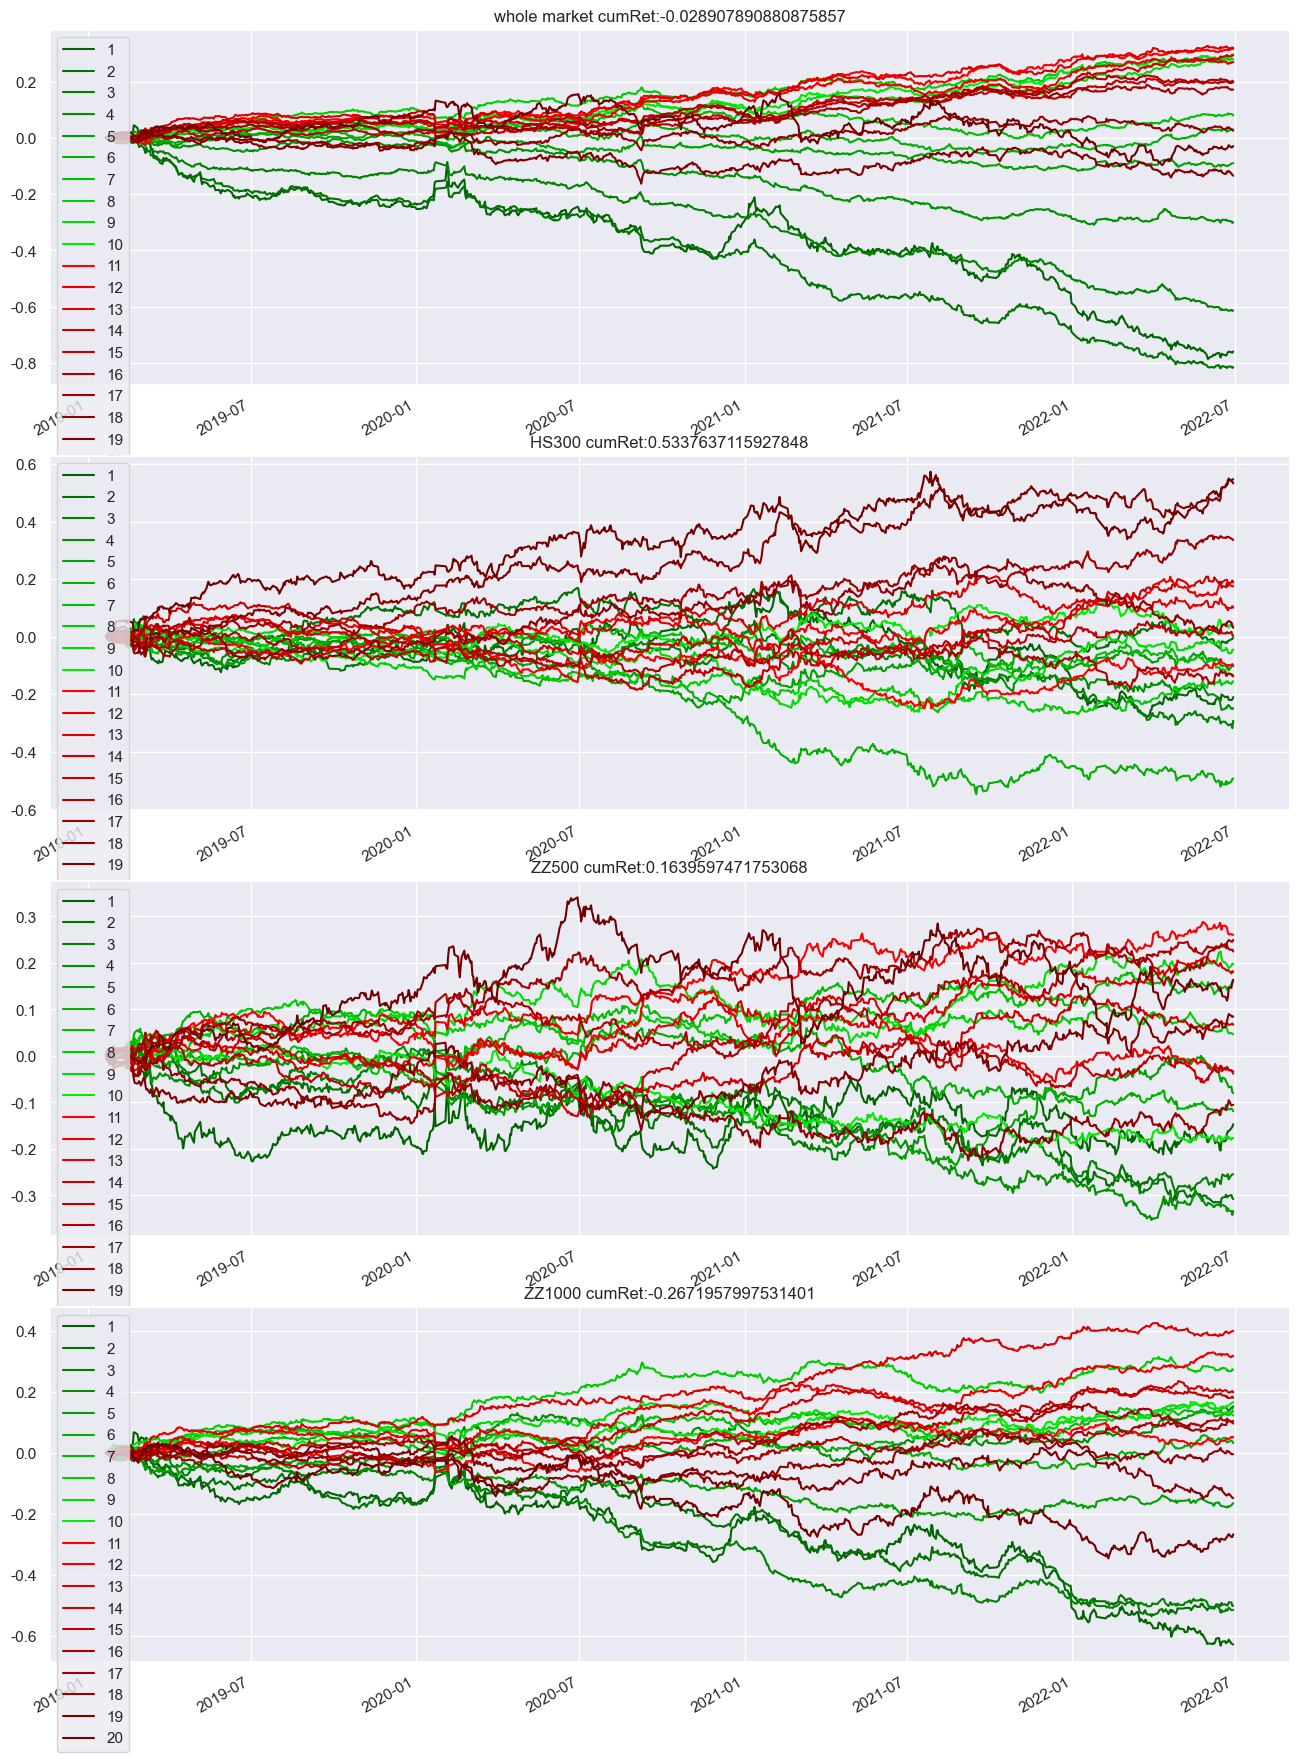

In [ ]:
df = Alpha101.alpha8(df)
BT = BackTest(df[key_col + ['alpha8']])
BT.ic_analysis(DB.ret_df)
